In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from replacers import RegexReplacer

from gensim.models.doc2vec import TaggedDocument
from gensim import utils

c:\users\laomd\appdata\local\programs\python\python36\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# remove HTML tag pattern
rc = re.compile(r"\<.*?\>")  
# Replacer class
replacer = RegexReplacer()
# Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [3]:
def constructTaggedDocuments(data):
    return [TaggedDocument (utils.to_unicode(row).split(), ['Text' + '_%s' % str(index)])
           for index, row in data.iteritems()]

def textClean(text):
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = text.lower().split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]    
    text = " ".join(text)
    return(text)
    
def cleanup(text):
    text = textClean(text)
    # text= text.translate(str.maketrans("","", string.punctuation))
    return text

In [3]:
# read data
train_text = pd.read_table("data/2/trainData.txt", encoding='utf-8', header=None)[0]
train_y = pd.read_table("data/2/trainLabel.txt", header=None)[0]

In [4]:
train_text[:5]

0    As long as there's been 3d technology, (1950's...
1    William Shakespeare's Merchant of Venice portr...
2    L'Auberge Espagnole is full of energy, and it'...
3    As I was reading through the comments, I was s...
4    The kind of B-movies from the 1950's that were...
Name: 0, dtype: object

In [5]:
train_y[:5]

0    0
1    1
2    1
3    1
4    0
Name: 0, dtype: int64

## 数据清洗

In [18]:
def SplitPhase(paragraph):
    """ split paragraph to sentences """
    PunktTokenizer = nltk.tokenize.punkt.PunktSentenceTokenizer()
    return PunktTokenizer.tokenize(paragraph)

def RemoveHTML(sentences):
    """ remove HTML tags """
    return [rc.sub('',sentence) for sentence in sentences]

def ReplaceAbbre(sentences):
    """ Replace abbreviation """
    return [replacer.replace(sentence) for sentence in sentences]

# using WordNetLemmatizer

In [7]:
def lemma(tags):
    WORD = []
    for word, tag in tags:
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v','n','s'] else None
        if not wntag:
            lemma = word
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, wntag)
        WORD.append(lemma)
    return WORD

In [8]:
def Lemmatizer(sentences):
    """ Lemmatizer words use WordNet """
    return [ lemma(nltk.pos_tag(sentence)) for sentence in sentences]

In [19]:
no_html_text = train_text.apply(RemoveHTML)

In [20]:
all_text[1]

["William Shakespeare's Merchant of Venice portrays 16th century Venice.",
 'Al Pacino plays Shylock, a Jewish loan shark who plots revenge on a Catholic that has looked down on him.',
 'The movie is a slow moving plot in the beginning that builds up throughout the two plus hours.',
 "The film gives a very good and believe appearance to it's characters, especially Pacino.",
 "When hearing that Pacino plays a Jew one might think that it would not work looking at Pacino's previous mobster type movie roles.",
 "Nonetheless it works very well, credit must be given to the costume designer's and director's of the film.",
 'The look of all the characters fits well with the time period the play takes place in.',
 'The costumes look like the Renaissance appearance one might envision to be.<br /><br />The film portrays a very anti-Semitic vibe.',
 'From the first minute to the last it is shown how the Catholic\'s try to take advantage of the Jews in every way they can, even to the point of keepi

In [22]:
no_html_text = all_text.apply(RemoveHTML)

["As long as there's been 3d technology, (1950's I think) there's been animation made for it.", 'I remember specifically, a Donald Duck cartoon with Chip and Dale in it.', "I don't remember the name at the moment, but the plot was that Donald worked at a circus, was feeding an elephant peanuts and Chip and Dale were stealing the peanuts.", "This was made to watch in 3d probably 1960's.", "If you happened to watch Meet the Robinsons in 3d in theaters, they showed this cartoon before the movie and explained the details of it's origin.", 'There are probably somewhere around 100 cartoons made specifically to be viewed through 3d glasses.', "This claim was a bad move because it's not difficult to prove them wrong.", 'On top of that, this just looks like a bad movie.']
["William Shakespeare's Merchant of Venice portrays 16th century Venice.", 'Al Pacino plays Shylock, a Jewish loan shark who plots revenge on a Catholic that has looked down on him.', 'The movie is a slow moving plot in the be

['Origins of the Care Bears & their Cousins.', "If you saw the original film you'll notice a discrepancy.", 'The Cousins are raised with the Care Bears, rather than meeting them later.', 'However I have no problems with that, preferring to treat the films as separate interpretations.', "The babies are adorable and it's fun watching them play and grow.", 'My favourite is Swift Heart Rabbit.', 'The villain is a delightfully menacing shapeshifter.', 'I could empathise with the three children since I was never good at sports either.', 'Cree Summer is excellent as Christy.', 'The songs are sweet and memorable.', 'If you have an open heart, love the toys or enjoyed the original, this is not to be missed.', '9/10']
['The 1970s opened the door to the largest, most diverse era of film in the history.', 'Some films were great ("The Godfather", "The Conversation", "Mean Streets", Chinatown", "The French Connection", "Five Easy Pieces", "Jaws", "McCabe And Mrs.', 'Miller") Others were not so great

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['This is like "Crouching Tiger, Hidden Dragon" in a more surreal, fantasy setting with incredible special effects and computer generated imagery that would put Industrial Light and Magic to shame.', 'The plot may be hard to follow, but that is the nature of translating Chinese folklore to the screen; certainly the overall story would probably be more familiar to its native audience.', 'However, an intelligent person should be able to keep up; moreover, the martial arts scenes potency are amplified by eye popping CGI.']
['The Puffy Chair was a supreme waste of 84 minutes of my life which cannot be retrieved and spent in a more worthwhile way (even "The Blair Witch Project" was a better use of life\'s precious moments).', 'It must be called "The Puffy Chair" because only \'puffy\' chairs could accommodate the extremely \'puffed-up\', self-important brothers who drooled it out for public consumption; and, obviously, they are SO full of themselves that they have assumed the public would 

['This film has some rather shocking scenes and subject matter considering it was made in 1971.<br /><br />Clint Eastwood, Geraldine Page, and Elizabeth Hartman do excellent work in the film, as do all the cast members.<br /><br />Set during the Civil War, the film begins when a wounded Yankee soldier, Johnny, portrayed by Clint Eastwood, is given refuge and help at a girls academy located in the south.<br /><br />The headmistress of the school, Ms.', 'Farnsworth (Geraldine Page), the one teacher-Edwina (Elizabeth Hartman), and a small group of half grown girls have been without a man in their midst for perhaps a little too long.<br /><br />While their loyalties lay with the Confederacy-- their emotions and physical needs definitely lead them in the opposite direction.', "Johnny immediately uses his masculine charms to try to win the women over to his side--and keep them from turning him over to the patrollers.<br /><br />However, feelings previously stoked by incestuous behavior, an a

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




["DOC SAVAGE: THE MAN OF BRONZE (1 outta 5 stars)<br /><br />Dreadful, dreadful movie... based on the pulp magazine/paperback series by Lester Dent/Kenneth Robeson... about a super-heroic adventure hero in the '30s and his five assistants, all experts in some field of endeavor that allows them to combat evil.", 'It was a pretty hokey series... but kinda fun to read when I was a teenager.', "I knew they made a movie version in the '70s, starring Ron (Tarzan) Ely... but I never got a chance to see it.", 'It never played in theaters where I lived and was never shown on TV.', 'Now that I have finally seen the film I can understand why.', "The plot and characters are never treated seriously... it's all kind of tongue-in-cheek and campy... kind of like the old Batman TV series... only without the benefit of being funny... or having any visual flair.", 'Corny dialogue, cheesy special effects, dumb stereotypes, crummy action scenes and bad, bad acting.', 'Actually, I find it kind of fascinati

In [23]:
no_html_text[1]

["William Shakespeare's Merchant of Venice portrays 16th century Venice.",
 'Al Pacino plays Shylock, a Jewish loan shark who plots revenge on a Catholic that has looked down on him.',
 'The movie is a slow moving plot in the beginning that builds up throughout the two plus hours.',
 "The film gives a very good and believe appearance to it's characters, especially Pacino.",
 "When hearing that Pacino plays a Jew one might think that it would not work looking at Pacino's previous mobster type movie roles.",
 "Nonetheless it works very well, credit must be given to the costume designer's and director's of the film.",
 'The look of all the characters fits well with the time period the play takes place in.',
 'The costumes look like the Renaissance appearance one might envision to be.The film portrays a very anti-Semitic vibe.',
 'From the first minute to the last it is shown how the Catholic\'s try to take advantage of the Jews in every way they can, even to the point of keeping them lock

In [6]:
all_text = train_text.apply(cleanup)

In [7]:
all_text.head()

0    long there's 3d technology, 1950's think there...
1    william shakespeare's merchant venice portrays...
2    l'auberge espagnole full energy, honest, reali...
3    reading comments, surprised come across one sa...
4    kind b-movies 1950's schlocky yet much fun pre...
Name: 0, dtype: object

In [10]:
sentences = constructTaggedDocuments(all_text)

In [14]:
sentences[1]

TaggedDocument(words=['william', "shakespeare's", 'merchant', 'venice', 'portrays', '16th', 'century', 'venice.', 'al', 'pacino', 'plays', 'shylock,', 'jewish', 'loan', 'shark', 'plots', 'revenge', 'catholic', 'looked', 'him.', 'movie', 'slow', 'moving', 'plot', 'beginning', 'builds', 'throughout', 'two', 'plus', 'hours.', 'film', 'gives', 'good', 'believe', 'appearance', 'characters,', 'especially', 'pacino.', 'hearing', 'pacino', 'plays', 'jew', 'one', 'might', 'think', 'would', 'work', 'looking', "pacino's", 'previous', 'mobster', 'type', 'movie', 'roles.', 'nonetheless', 'works', 'well,', 'credit', 'must', 'given', 'costume', "designer's", "director's", 'film.', 'look', 'characters', 'fits', 'well', 'time', 'period', 'play', 'takes', 'place', 'in.', 'costumes', 'look', 'like', 'renaissance', 'appearance', 'one', 'might', 'envision', 'be.<br', '/', '<br', '/', 'film', 'portrays', 'anti-semitic', 'vibe.', 'first', 'minute', 'last', 'shown', "catholic's", 'try', 'take', 'advantage', '

## 数据转vector

In [12]:
from gensim.models import Doc2Vec
from sklearn.linear_model import LogisticRegression     # 用逻辑回归做模型
from sklearn.model_selection import cross_val_score

In [12]:
VecType = Doc2Vec

In [13]:
VecType.__name__

'Doc2Vec'

##    Parameters
    def __init__(self, documents=None, corpus_file=None, dm_mean=None, dm=1, dbow_words=0, dm_concat=0,
                 dm_tag_count=1, docvecs=None, docvecs_mapfile=None, comment=None, trim_rule=None, callbacks=(),
                 **kwargs):
    ----------
    documents : iterable of list of :class:`~gensim.models.doc2vec.TaggedDocument`, optional
        Input corpus, can be simply a list of elements, but for larger corpora,consider an iterable that streams
        the documents directly from disk/network. If you don't supply `documents`, the model is
        left uninitialized -- use if you plan to initialize it in some other way.
    corpus_file : str, optional
        Path to a corpus file in :class:`~gensim.models.word2vec.LineSentence` format.
        You may use this argument instead of `sentences` to get performance boost. Only one of `sentences` or
        `corpus_file` arguments need to be passed (or none of them).
    dm : {1,0}, optional
        Defines the training algorithm. If `dm=1`, 'distributed memory' (PV-DM) is used.
        Otherwise, `distributed bag of words` (PV-DBOW) is employed.
    vector_size : int, optional
        Dimensionality of the feature vectors.
    window : int, optional
        The maximum distance between the current and predicted word within a sentence.
    alpha : float, optional
        The initial learning rate.
    min_alpha : float, optional
        Learning rate will linearly drop to `min_alpha` as training progresses.
    seed : int, optional
        Seed for the random number generator. Initial vectors for each word are seeded with a hash of
        the concatenation of word + `str(seed)`. Note that for a fully deterministically-reproducible run,
        you must also limit the model to a single worker thread (`workers=1`), to eliminate ordering jitter
        from OS thread scheduling.
        In Python 3, reproducibility between interpreter launches also requires use of the `PYTHONHASHSEED`
        environment variable to control hash randomization.
    min_count : int, optional
        Ignores all words with total frequency lower than this.
    max_vocab_size : int, optional
        Limits the RAM during vocabulary building; if there are more unique
        words than this, then prune the infrequent ones. Every 10 million word types need about 1GB of RAM.
        Set to `None` for no limit.
    sample : float, optional
        The threshold for configuring which higher-frequency words are randomly downsampled,
        useful range is (0, 1e-5).
    workers : int, optional
        Use these many worker threads to train the model (=faster training with multicore machines).
    epochs : int, optional
        Number of iterations (epochs) over the corpus.
    hs : {1,0}, optional
        If 1, hierarchical softmax will be used for model training.
        If set to 0, and `negative` is non-zero, negative sampling will be used.
    negative : int, optional
        If > 0, negative sampling will be used, the int for negative specifies how many "noise words"
        should be drawn (usually between 5-20).
        If set to 0, no negative sampling is used.
    ns_exponent : float, optional
        The exponent used to shape the negative sampling distribution. A value of 1.0 samples exactly in proportion
        to the frequencies, 0.0 samples all words equally, while a negative value samples low-frequency words more
        than high-frequency words. The popular default value of 0.75 was chosen by the original Word2Vec paper.
        More recently, in https://arxiv.org/abs/1804.04212, Caselles-Dupré, Lesaint, & Royo-Letelier suggest that
        other values may perform better for recommendation applications.
    dm_mean : {1,0}, optional
        If 0 , use the sum of the context word vectors. If 1, use the mean.
        Only applies when `dm` is used in non-concatenative mode.
    dm_concat : {1,0}, optional
        If 1, use concatenation of context vectors rather than sum/average;
        Note concatenation results in a much-larger model, as the input
        is no longer the size of one (sampled or arithmetically combined) word vector, but the
        size of the tag(s) and all words in the context strung together.
    dm_tag_count : int, optional
        Expected constant number of document tags per document, when using
        dm_concat mode.
    dbow_words : {1,0}, optional
        If set to 1 trains word-vectors (in skip-gram fashion) simultaneous with DBOW
        doc-vector training; If 0, only trains doc-vectors (faster).
    trim_rule : function, optional
        Vocabulary trimming rule, specifies whether certain words should remain in the vocabulary,
        be trimmed away, or handled using the default (discard if word count < min_count).
        Can be None (min_count will be used, look to :func:`~gensim.utils.keep_vocab_item`),
        or a callable that accepts parameters (word, count, min_count) and returns either
        :attr:`gensim.utils.RULE_DISCARD`, :attr:`gensim.utils.RULE_KEEP` or :attr:`gensim.utils.RULE_DEFAULT`.
        The rule, if given, is only used to prune vocabulary during current method call and is not stored as part
        of the model.

        The input parameters are of the following types:
            * `word` (str) - the word we are examining
            * `count` (int) - the word's frequency count in the corpus
            * `min_count` (int) - the minimum count threshold.

    callbacks : :obj: `list` of :obj: `~gensim.models.callbacks.CallbackAny2Vec`, optional
        List of callbacks that need to be executed/run at specific stages during training.


In [13]:
filename='trained_vecs/2/trainData_clean.vec'
text_model = Doc2Vec(min_count=1, window=5, 
                     vector_size=150, 
                     negative=25, workers=4, 
                     epochs=25, alpha=0.05, seed=4)
text_model.build_vocab(sentences)
text_model.train(sentences, total_examples=text_model.corpus_count, epochs=text_model.epochs)

KeyboardInterrupt: 

In [22]:
text_model.save(filename)
# text_model = Doc2Vec.load(filename)

In [23]:
data = np.array([text_model.docvecs['Text_'+str(i)] for i in range(len(train_text))])

In [24]:
data[:5]

array([[ 8.97976339e-01, -7.52540231e-01,  2.04513431e+00,
        -8.55905533e-01, -2.29428172e+00, -1.99305296e+00,
        -1.53948152e+00,  4.97840822e-01, -7.53712535e-01,
         1.28665245e+00, -8.77376676e-01,  7.33760953e-01,
        -1.17904317e+00,  4.22223330e-01,  8.00953448e-01,
        -2.71314240e+00, -2.69650400e-01,  1.90351105e+00,
        -1.12113571e+00, -5.28665245e-01, -4.82490778e-01,
        -2.89393616e+00, -3.64178754e-02,  1.03160334e+00,
         1.20031405e-02, -1.09143043e+00, -4.24810499e-01,
         1.24755955e+00,  1.40458322e+00,  7.50815094e-01,
         6.11275546e-02, -7.51111209e-01, -7.95800745e-01,
         1.43203139e+00,  5.22482991e-01, -4.60974169e+00,
        -1.20615780e+00, -1.52807903e+00, -1.48960841e+00,
         1.95232081e+00, -2.35811925e+00,  2.04465318e+00,
        -8.03631186e-01, -7.55493879e-01,  5.69580138e-01,
         1.00461555e+00,  3.68598342e-01,  1.31550372e+00,
        -1.13665140e+00,  8.97321045e-01,  4.59804088e-0

In [25]:
model = LogisticRegression()
cross_val_score(model, data, train_y, cv=5, scoring='accuracy').mean()   # window=5, dm=1(distributed memory), min_count=1

c:\users\laomd\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\laomd\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\laomd\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\laomd\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\laomd\appdata\local\programs\python\python36\lib\si

0.8710001887659224

In [33]:
from importlib import reload
from logistic_model import logistic_regression, base
reload(base)
reload(logistic_regression)
from logistic_model.logistic_regression import SimpleLogisticRegression

In [32]:
clf = SimpleLogisticRegression()
clf.fit(data, train_y)

In [34]:
cross_val_score(SimpleLogisticRegression(), data, train_y, cv=5, scoring='accuracy').mean()   # window=5, dm=1(distributed memory), min_count=1

0.8714583333333333

# 比较不同模型

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier

In [51]:
classifiers = [KNeighborsClassifier(), DecisionTreeClassifier(), 
               LogisticRegression(penalty='l1'), Perceptron(), 
               RandomForestClassifier(n_estimators=25)]

acc_dict = {}
for classifier in classifiers:
    name = classifier.__class__.__name__
    acc = cross_val_score(classifier, data, train_y, cv=5, scoring='accuracy').mean()
    acc_dict[name] = acc
    print(name, acc)

KNeighborsClassifier 0.648208839433254
DecisionTreeClassifier 0.6360418167064591


c:\users\laomd\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\laomd\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\laomd\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\laomd\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\laomd\appdata\local\programs\python\python36\lib\si

LogisticRegression 0.7282496654079715


c:\users\laomd\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\laomd\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\laomd\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been 

Perceptron 0.604710643918286
RandomForestClassifier 0.7090001685763963


In [52]:
acc_dict

{'KNeighborsClassifier': 0.648208839433254,
 'DecisionTreeClassifier': 0.6360418167064591,
 'LogisticRegression': 0.7282496654079715,
 'Perceptron': 0.604710643918286,
 'RandomForestClassifier': 0.7090001685763963}

               Classifier  Accuracy
0    KNeighborsClassifier  0.648209
0  DecisionTreeClassifier  0.636042
0      LogisticRegression  0.728250
0              Perceptron  0.604711
0  RandomForestClassifier  0.709000


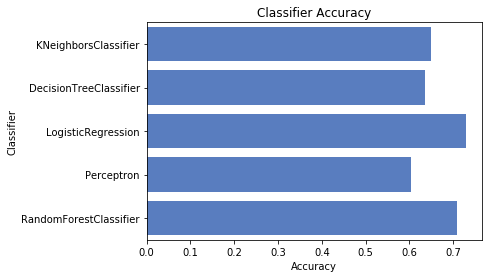

In [53]:
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

for clf, acc in acc_dict.items():
    log_entry = pd.DataFrame([[clf, acc]], columns=log_cols)
    log = log.append(log_entry)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes('muted')
print(log)
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")